# Defi Credit Score: Data and Problem Flow Notebook

This notebook illustrates how we want to apporach the problem of giving a user a credit score based on their on chain history. 

(If you want to load the data yourself, you can run the `graphql-fetcher.py` script.)


We'll go over the problem in a few parts:

- UserTransactions: Let's explore the all the transaction data we have available 
- ModelUseCase: How we want to serve the model? 
- UserMapping: From the serving use case, all a user's transactions
- 


In [1]:
import os
import sys
import json


# Part 1: A look at the data available (All UserTransactions)

First we get all the userTransactions from the api via the graphql-fetcher. These events are saved in a file called `all_events.json`


We can create a dataframe of all userTransactions from the all_events.json file with the following steps:



In [2]:
# Part 1: A look at the data:

# check for the all_events.json data file
print("checking for event data on disk ...")
data_file = os.getcwd() + '/../data/all_events.json' # get file location
data_file # str


checking for event data on disk ...


'/home/j3/code/defi_credit_score/notebooks/../data/all_events.json'

In [3]:
# Part 1: A look at the data:

# load the all events.json from disk to an object we can use

if os.path.isfile(data_file):
    print("\"all_events.json\" found, loading from disk.")
    with open(data_file) as f:
        all_events = json.load(f)


"all_events.json" found, loading from disk.


In [4]:
# Part 1: A look at the data:

# now we have access to all_events 
len(all_events)

461549

In [5]:
# Part 1: A look at the data:

# now that we have all the events in python, let's look at a few of them. 
all_events[:2]

[{'timestamp': 1627952617,
  'user_id': '0x1eebec3312d9345c09b1a74fb7502a68660c089b',
  'txn_id': '0x452aee6d672f5be5aa3221def15850d2a9598ec137e439ed01747276d067b46d:3',
  'event_type': 'unknown'},
 {'timestamp': 1627947707,
  'user_id': '0x5b2a89ee094ec6778ed72be05f0e219b956dbbb0',
  'txn_id': '0x5b0d2ed0320217225b62811617a09b65c799db05bf676c892f81f7348c045618:3',
  'event_type': 'unknown'}]

## Part 1.b: Load data into dataframe


In [6]:
### Part 1.b: Load data into dataframe

# we can easily turn a dict of event data into a dataframe. 
# Our keys will be the columns. 
# Our values (is is a list of values per key), will be all the rows. 

# dict
# {
#     col1: [row1, row2, row3, row4, ...],
#     col2: [row1, row2, row3, row4, ...],
#     col3: [row1, row2, row3, row4, ...],
#     col4: [row1, row2, row3, row4, ...]
# }

import pandas as pd
user_transactions = pd.DataFrame(all_events)


In [7]:
### Part 1.b: Load data into dataframe

user_transactions

,timestamp,user_id,txn_id,event_type,amount,pool_id,pool_lendingPool,reserve_id,reserve_symbol,accruedBorrowInterest,...,borrowRateMode,amountAfterFee,fee,collateralAmount,collateralReserve_id,collateralReserve_underlyingAsset,liquidator,principalAmount,principalReserve_id,principalReserve_underlyingAsset
0,1627952617,0x1eebec3312d9345c09b1a74fb7502a68660c089b,0x452aee6d672f5be5aa3221def15850d2a9598ec137e4...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1627947707,0x5b2a89ee094ec6778ed72be05f0e219b956dbbb0,0x5b0d2ed0320217225b62811617a09b65c799db05bf67...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1627947497,0x1eebec3312d9345c09b1a74fb7502a68660c089b,0x60b56991a2d6c23ff41e13431904bb43f3182b31ac2b...,deposit,1218284692576855568525,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x6b175474e89094c44da98b954eedeac495271d0f0x24...,DAI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1627945331,0x1eebec3312d9345c09b1a74fb7502a68660c089b,0x6b805a7d536af417fc23aca2f3f8f59b84ac408aadb3...,deposit,224709657539875960368546,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x6b175474e89094c44da98b954eedeac495271d0f0x24...,DAI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1627936585,0x39132c7f68616ffd34dba3cacfd1635f3b64ddf6,0x77ed6a261db0a0a67b24b81953a3a8f37aa140aeff43...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461544,1578505466,0x6b4fc9c327eca193f7d21b0202e68c5df5eafaa6,0x5cf2cad66b0fbb6e2d32f31addb11443a5c54887f786...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461545,1578505416,0x6b4fc9c327eca193f7d21b0202e68c5df5eafaa6,0x0ae2a6f2883a25bc5fecd429460a37938a5edfb4aad7...,deposit,63053681658949241179,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xe41d2489571d322189246dafa5ebde1f4699f4980x24...,ZRX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461546,1578505074,0x6b4fc9c327eca193f7d21b0202e68c5df5eafaa6,0x9b02ca82d622b4cc82e77f42d66901df9dc4d8f4d973...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461547,1578504936,0x6b4fc9c327eca193f7d21b0202e68c5df5eafaa6,0x75019cc109721c59bf70a4a51f40f94fedfe06dbb9aa...,deposit,42731,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x2260fac5e5542a773aa44fbcfedf7c193bc2c5990x24...,WBTC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 1.c: Explore dataframe

In [8]:
# Part 1.c: Explore dataframe
user_transactions.head(10)

,timestamp,user_id,txn_id,event_type,amount,pool_id,pool_lendingPool,reserve_id,reserve_symbol,accruedBorrowInterest,...,borrowRateMode,amountAfterFee,fee,collateralAmount,collateralReserve_id,collateralReserve_underlyingAsset,liquidator,principalAmount,principalReserve_id,principalReserve_underlyingAsset
0,1627952617,0x1eebec3312d9345c09b1a74fb7502a68660c089b,0x452aee6d672f5be5aa3221def15850d2a9598ec137e4...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1627947707,0x5b2a89ee094ec6778ed72be05f0e219b956dbbb0,0x5b0d2ed0320217225b62811617a09b65c799db05bf67...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1627947497,0x1eebec3312d9345c09b1a74fb7502a68660c089b,0x60b56991a2d6c23ff41e13431904bb43f3182b31ac2b...,deposit,1218284692576855568525,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x6b175474e89094c44da98b954eedeac495271d0f0x24...,DAI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1627945331,0x1eebec3312d9345c09b1a74fb7502a68660c089b,0x6b805a7d536af417fc23aca2f3f8f59b84ac408aadb3...,deposit,224709657539875960368546,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x6b175474e89094c44da98b954eedeac495271d0f0x24...,DAI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1627936585,0x39132c7f68616ffd34dba3cacfd1635f3b64ddf6,0x77ed6a261db0a0a67b24b81953a3a8f37aa140aeff43...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1627936585,0x39132c7f68616ffd34dba3cacfd1635f3b64ddf6,0x1718f60071c685652110b9734ca1718b79bd024784a0...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1627934326,0x39132c7f68616ffd34dba3cacfd1635f3b64ddf6,0xac4456e1e3303534081cfa3230c1aeda63f98841d9d1...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1627934303,0x21ce16237406a6e731e32503639ddd5992f23d6a,0xf0a71e23d4505879bda91c7f088e912f3846bdee6885...,borrow,10000000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480x24...,USDC,3375240,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1627929059,0x959237c226ba652196be8641a7d497b6fd4bbb33,0x67e043e7861830c96719abd295624f4d1100eb67d265...,deposit,500000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480x24...,USDC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1627918685,0xdac09f37e132d91b962f30e6ec40d2d08b82b0fa,0x7e7f62de45d856ba42ecb13c4d597f5df65f3b429cb7...,unknown,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Part 1.c: Explore dataframe

# dataframe shape
user_transactions.shape

(461549, 21)

In [10]:
# Part 1.c: Explore dataframe

# check our columns
user_transactions.columns


Index(['timestamp', 'user_id', 'txn_id', 'event_type', 'amount', 'pool_id',
       'pool_lendingPool', 'reserve_id', 'reserve_symbol',
       'accruedBorrowInterest', 'borrowRate', 'borrowRateMode',
       'amountAfterFee', 'fee', 'collateralAmount', 'collateralReserve_id',
       'collateralReserve_underlyingAsset', 'liquidator', 'principalAmount',
       'principalReserve_id', 'principalReserve_underlyingAsset'],
      dtype='object')

In [11]:
# Part 1.c: Explore dataframe

user_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461549 entries, 0 to 461548
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   timestamp                          461549 non-null  int64 
 1   user_id                            461549 non-null  object
 2   txn_id                             461549 non-null  object
 3   event_type                         461549 non-null  object
 4   amount                             254540 non-null  object
 5   pool_id                            319884 non-null  object
 6   pool_lendingPool                   319884 non-null  object
 7   reserve_id                         315279 non-null  object
 8   reserve_symbol                     315279 non-null  object
 9   accruedBorrowInterest              82397 non-null   object
 10  borrowRate                         82397 non-null   object
 11  borrowRateMode                     82397 non-null   

In [12]:
# Part 1.c: Explore dataframe

# we have columns we know we want to be treated as numerical, so let's fix those up. 
obj_col_names = ["amount", "fee", "amountAfterFee", "accruedBorrowInterest", "borrowRate", "fee", "collateralAmount", "principalAmount"]

obj_cols = user_transactions[obj_col_names]
num_cols = obj_cols.apply(pd.to_numeric, errors = 'coerce')
num_cols.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461549 entries, 0 to 461548
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   amount                 254540 non-null  float64
 1   fee                    60739 non-null   float64
 2   amountAfterFee         60739 non-null   float64
 3   accruedBorrowInterest  82397 non-null   float64
 4   borrowRate             82397 non-null   float64
 5   fee                    60739 non-null   float64
 6   collateralAmount       4605 non-null    float64
 7   principalAmount        4605 non-null    float64
dtypes: float64(8)
memory usage: 28.2 MB


In [13]:
# Part 1.c: Explore dataframe

# List of numerical attributes:
num_cols.select_dtypes(exclude=['object']).columns

Index(['amount', 'fee', 'amountAfterFee', 'accruedBorrowInterest',
       'borrowRate', 'fee', 'collateralAmount', 'principalAmount'],
      dtype='object')

In [14]:
# Part 1.c: Explore dataframe

# List of numerical attributes summary stats
num_cols.describe()

,amount,fee,amountAfterFee,accruedBorrowInterest,borrowRate,fee,collateralAmount,principalAmount
count,2.545400e+05,6.073900e+04,6.073900e+04,8.239700e+04,8.239700e+04,6.073900e+04,4.605000e+03,4.605000e+03
mean,2.518189e+22,1.608455e+18,3.141824e+22,2.503811e+19,6.688746e+25,1.608455e+18,4.071923e+21,9.520975e+21
std,4.191829e+23,3.439234e+19,2.491429e+23,4.129698e+20,1.208226e+26,3.439234e+19,3.557255e+22,8.598254e+22
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.019367e+21,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.846691e+10,0.000000e+00,9.195776e+09,0.000000e+00,2.825053e+25,0.000000e+00,4.728664e+16,6.324029e+09
50%,2.205070e+19,9.000000e+02,1.775812e+18,1.957555e+06,4.817558e+25,9.000000e+02,1.026475e+19,6.337500e+17
75%,9.133257e+20,7.429910e+13,2.001411e+21,3.065918e+15,7.332433e+25,7.429910e+13,3.402545e+20,1.246148e+21
max,5.612886e+25,3.125000e+21,1.709054e+25,4.073305e+22,3.070000e+27,3.125000e+21,1.535580e+24,2.474762e+24


In [15]:
# Part 1.c: Explore dataframe

# List of categorical attributes
user_transactions.select_dtypes(include=['object']).columns


Index(['user_id', 'txn_id', 'event_type', 'amount', 'pool_id',
       'pool_lendingPool', 'reserve_id', 'reserve_symbol',
       'accruedBorrowInterest', 'borrowRate', 'borrowRateMode',
       'amountAfterFee', 'fee', 'collateralAmount', 'collateralReserve_id',
       'collateralReserve_underlyingAsset', 'liquidator', 'principalAmount',
       'principalReserve_id', 'principalReserve_underlyingAsset'],
      dtype='object')

In [16]:
# Part 1.c: Explore dataframe

# categorical attribut summary statistics
user_transactions.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
user_id,461549,36912,0xf617346a0fb6320e9e578e0c9b2a4588283d9d39,12639
txn_id,461549,461549,0x452aee6d672f5be5aa3221def15850d2a9598ec137e4...,1
event_type,461549,5,deposit,172143
amount,254540,148799,1000000000000000000,2651
pool_id,319884,2,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,318447
pool_lendingPool,319884,2,0x398ec7346dcd622edc5ae82352f02be94c62d119,318447
reserve_id,315279,32,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0x24...,51670
reserve_symbol,315279,31,ETH,52271
accruedBorrowInterest,82397,52217,0,29667
borrowRate,82397,82206,650000000000000000000000000,116


In [17]:
# Part 1.c: Explore dataframe

# Let's look at the event types we have. 
user_transactions["event_type"].describe()

count      461549
unique          5
top       deposit
freq       172143
Name: event_type, dtype: object

In [20]:
!pip install seaborn

In [22]:
# Part 1.c: Explore dataframe

# Let's explore the distrbution of event types
user_transactions["event_type"].value_counts()


deposit             172143
unknown             141665
borrow               82397
repay                60739
liquidation_call      4605
Name: event_type, dtype: int64

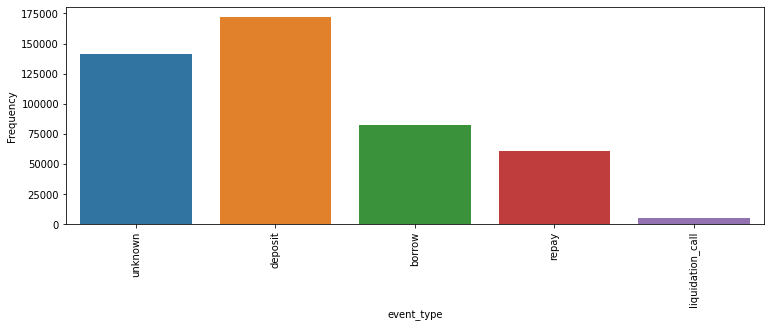

In [25]:
# Part 1.c: Explore dataframe

# Let's explore the distrbution of event types
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12.5,4))
sns.countplot(x='event_type', data=user_transactions)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()


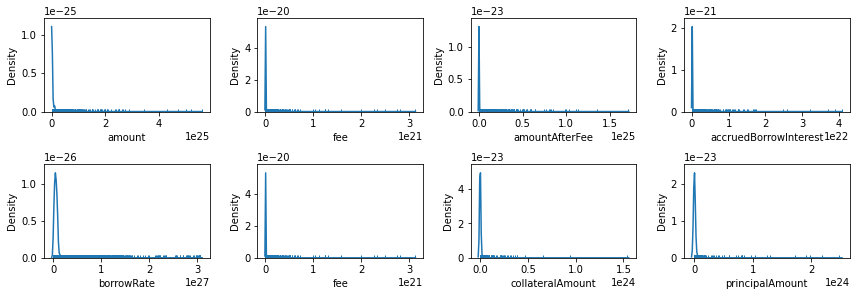

In [28]:
# Part 1.c: Explore dataframe

import warnings
warnings.filterwarnings('ignore') 

# Exploring numerical attributes 
num_attributes = num_cols.copy()

# Get distribution plots for all numerical attributes
fig = plt.figure(figsize=(12,18))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(), hist = False, rug = True)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()


In [57]:
# Part 1.c: Explore dataframe

# all borrow events
user_transactions[user_transactions["event_type"] == "borrow"]

,timestamp,user_id,txn_id,event_type,amount,pool_id,pool_lendingPool,reserve_id,reserve_symbol,accruedBorrowInterest,...,borrowRateMode,amountAfterFee,fee,collateralAmount,collateralReserve_id,collateralReserve_underlyingAsset,liquidator,principalAmount,principalReserve_id,principalReserve_underlyingAsset
7,1627934303,0x21ce16237406a6e731e32503639ddd5992f23d6a,0xf0a71e23d4505879bda91c7f088e912f3846bdee6885...,borrow,10000000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480x24...,USDC,3375240,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1627896917,0x473869d211a9364b13806b97882f741acc444295,0x9276c4240f481cbe03cb5072593744c8e41353cce8dc...,borrow,3000000000000000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0x24...,ETH,3751967947903407,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,1627861398,0x440efbba3f3d971fd8411c580197ecb53ef71f87,0xca62d0cac156472b930b440575ca85e9f4cf84a16636...,borrow,15000000000000000000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x0000000000085d4780b73119b644ae5ecd22b3760x24...,TUSD,35900666116638245794,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1627856070,0x738726961dabef11514ec9b75e0665ee0050ebc4,0xabada446ef02a776217064061d4bbe199b8270ddbd40...,borrow,33983728169,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480x24...,USDC,54042754,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,1627833352,0x0d9f4d0dabbfa76a5ccec6a1542326ca3da57ae5,0x22afeb0053ffcd56670b94257d43f7cd186fd08799f1...,borrow,2000000000000000000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x0000000000085d4780b73119b644ae5ecd22b3760x24...,TUSD,569941422291171815,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461527,1578506443,0x5d3183cb8967e3c9b605dc35081e5778ee462328,0x9b327bdcb9576a134446297268150e5aac4ea165242b...,borrow,100000000000000000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x0000000000085d4780b73119b644ae5ecd22b3760x24...,TUSD,0,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461529,1578506331,0x5d3183cb8967e3c9b605dc35081e5778ee462328,0x78d1eb85882c86e19e4447e028189fd512684440cfa2...,borrow,100000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480x24...,USDC,0,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461532,1578506080,0x6b4fc9c327eca193f7d21b0202e68c5df5eafaa6,0x095e6a129dff7757b6ad3b706edcc3c2fe9c5435b83c...,borrow,12347142096305911092,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xe41d2489571d322189246dafa5ebde1f4699f4980x24...,ZRX,0,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461533,1578506041,0x5d3183cb8967e3c9b605dc35081e5778ee462328,0xf02364679b70045cacd1f21d8345bef39afa1390bb97...,borrow,1000000000000000000000,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x6b175474e89094c44da98b954eedeac495271d0f0x24...,DAI,0,...,Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Part 1.c: Explore dataframe

# all repay events: 
user_transactions[user_transactions["event_type"] == "repay"]

,timestamp,user_id,txn_id,event_type,amount,pool_id,pool_lendingPool,reserve_id,reserve_symbol,accruedBorrowInterest,...,borrowRateMode,amountAfterFee,fee,collateralAmount,collateralReserve_id,collateralReserve_underlyingAsset,liquidator,principalAmount,principalReserve_id,principalReserve_underlyingAsset
21,1627879609,0xd4bce9c082e315b8e3d0a79bfb5c6daa36e9531b,0x98a12679af49ec57f7660ea2d44e4cf9f65d486f109b...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xdac17f958d2ee523a2206206994597c13d831ec70x24...,USDT,NaN,...,NaN,21923902804,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1627866040,0xfb5c17f3941bbde978a7c47ad03be737f2003489,0x91a85ba8018a6284529ad1c9955e5c90311d789eeab9...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0x24...,ETH,NaN,...,NaN,999999844420591181,155579408819,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1627860470,0x738726961dabef11514ec9b75e0665ee0050ebc4,0x607e8f3d8f3e4ae82321d41c414a9a58a32aa7991100...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480x24...,USDC,NaN,...,NaN,33650539866,39909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1627859752,0x745d939cad45d371a9b136d32b959cb5c7005f84,0xa19b717c79ee31ab403562b80553e5b6913943678187...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x0000000000085d4780b73119b644ae5ecd22b3760x24...,TUSD,NaN,...,NaN,2469026948490738010424,63447483838684129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1627856243,0x745d939cad45d371a9b136d32b959cb5c7005f84,0xc14d59ccab0915017e8e3c8468d8d824a5e3aa766716...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480x24...,USDC,NaN,...,NaN,4330508687,412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461482,1578517035,0xf4d9a2d0075e0f003410ae774456fbeeedd18c72,0x513502a6a21c5dc6c119ecda6e2241b85f0ee345f373...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x514910771af9ca656af840dff83e8264ecf986ca0x24...,LINK,NaN,...,NaN,140471701523504553,352059402314548,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461522,1578507381,0x6b4fc9c327eca193f7d21b0202e68c5df5eafaa6,0xd86fdea9b34c33ebf3a14c6a4763476a998e469effe3...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0x9f8f72aa9304c8b593d555f12ef6589cc3a579a20x24...,MKR,NaN,...,NaN,3064977088240704,15363292539158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461530,1578506250,0x6b4fc9c327eca193f7d21b0202e68c5df5eafaa6,0x84b8da004013a8bcad45404420a840bccef94c5c5f5e...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f0x24...,SNX,NaN,...,NaN,1071708062621108150,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
461531,1578506093,0x6b4fc9c327eca193f7d21b0202e68c5df5eafaa6,0x05bb2b6ae213c3c0ff5207591f347b0473d74c4265d2...,repay,NaN,0x24a42fd28c976a61df5d00d0599c34c4f90748c8,0x398ec7346dcd622edc5ae82352f02be94c62d119,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f0x24...,SNX,NaN,...,NaN,1428944850306553904,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 2: ModelUseCase: 

## Part 2.a: Predict a User's Score based on their past actions

tl:dr: user_address -> api, api -> model, model -> score -> user

Let's imagine how our user would interface with our service. 

Let's say they upload their wallett address to our service, and when they do so, our api would then pull all their past transactions from Aave, run our risk model, and return a credit score.

(For the sake of this excercise, let's say will just return a probability the user will default from their past actions. Higher probability of liquidation is analogous to a lower credit score.) 



## Part 2.b: Map Transactions to Users

For this excercise, let's plan to give a credit score to a user based on their previous history. This will take into account their past actions and give them a probability they will default. 

To do this, we'll want to get all of a user's past transactions:

## Part2.b: Map Transactions to Users: 
### "all_user_mapping.json" 

```python
This gives us a nice mapping for a user and all their given events
"""
{
    user1_id: [
        {event1}
        {event2}
        {event3}
        {event4}
    ]
    user2_id:        
        {event1}
        {event2}
        {event3}
        {event4}
}
"""
```


In [16]:
# Part2.b: Map Transactions to Users: 

""" 
    Let's load this mapping from disk
"""

# check for the data file
print("checking for event data on disk ...")
data_file = os.getcwd() + '/../data/all_user_mapping.json' # get file location
# data_file # str

if os.path.isfile(data_file):
    print("\"all_user_mapping.json\" found, loading from disk.")
    with open(data_file) as f:
        user_event_mapping = json.load(f)

checking for event data on disk ...
"all_user_mapping.json" found, loading from disk.


In [17]:
### Part2.b: Map Transactions to Users: 


# we have a user mapping dictionary from the data pipeline
type(user_event_mapping)

dict

In [18]:
### Part2.b: Map Transactions to Users: 


# the keys are user ids, let's look at the first 20
list(user_event_mapping)[:20]


['0x1eebec3312d9345c09b1a74fb7502a68660c089b',
 '0x5b2a89ee094ec6778ed72be05f0e219b956dbbb0',
 '0x39132c7f68616ffd34dba3cacfd1635f3b64ddf6',
 '0x21ce16237406a6e731e32503639ddd5992f23d6a',
 '0x959237c226ba652196be8641a7d497b6fd4bbb33',
 '0xdac09f37e132d91b962f30e6ec40d2d08b82b0fa',
 '0xbf609e91ffedc7e5cf9704d9f3c0acea81126d21',
 '0x6f38525a99a2a6dcd40be420cf752b13178058df',
 '0x95ed6f043bbc9fbf604a6879869d03b31686294d',
 '0x473869d211a9364b13806b97882f741acc444295',
 '0xdda2d57aa2cb55af90e42cc8c71f6c63fae58a56',
 '0x34c8c9d9d4c5abe245df85c159a566322840b6a5',
 '0x66f54006b47d1b381b5b933f2de9bf05a6b4eb40',
 '0xd255f83c6fedb746763fbc86f4476c46d114feee',
 '0xc176761d388caf2f56cf03329d82e1e7c48ae09c',
 '0xd4bce9c082e315b8e3d0a79bfb5c6daa36e9531b',
 '0x6067b8470c1cea51c4fdac7afc53f50c8b122ebe',
 '0xfb5c17f3941bbde978a7c47ad03be737f2003489',
 '0x05d534f28700ba8f749a403e181c557fda6888fe',
 '0x745d939cad45d371a9b136d32b959cb5c7005f84']

In [19]:
### Part2.b: Map Transactions to Users: 


# let's see how many events there are for a given user.

print(f"number of events for user id 0x1eebec3312d9345c09b1a74fb7502a68660c089b:\n{len(user_event_mapping['0x1eebec3312d9345c09b1a74fb7502a68660c089b'])}")

print("so we have 105 events for this user")


number of events for user id 0x1eebec3312d9345c09b1a74fb7502a68660c089b:
105
so we have 105 events for this user


In [20]:
### Part2.b: Map Transactions to Users: 


"""
    let's take a look at the first 5 events to get an idea of what an event looks like. 
"""


user_id = '0x473869d211a9364b13806b97882f741acc444295'
user_events = user_event_mapping[user_id]
user_events[:3]



[{'accruedBorrowInterest': '3751967947903407',
  'amount': '3000000000000000000',
  'borrowRate': '2976595229856732580413260',
  'borrowRateMode': 'Variable',
  'pool_id': '0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'pool_lendingPool': '0x398ec7346dcd622edc5ae82352f02be94c62d119',
  'reserve_id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'reserve_symbol': 'ETH',
  'timestamp': 1627896917,
  'user_id': '0x473869d211a9364b13806b97882f741acc444295',
  'txn_id': '0x9276c4240f481cbe03cb5072593744c8e41353cce8dc46573eef4ad78f374892:2',
  'event_type': 'borrow'},
 {'accruedBorrowInterest': '16691246483628532',
  'amount': '1000000000000000000',
  'borrowRate': '3160002280071311351640116',
  'borrowRateMode': 'Variable',
  'pool_id': '0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'pool_lendingPool': '0x398ec7346dcd622edc5ae82352f02be94c62d119',
  'reserve_id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0x24a42fd28c976a61df5d00d0599c34c4f90748

In [21]:
### Part2.b: Map Transactions to Users: 

"""
    A key aspect of these events is the timestamp. We can use this to get the past and future for a user at a given point in time. 
"""

first_event = user_events[0]
print("first event:\n", first_event)
print("\nfirst event timestamp:", first_event['timestamp'])


first event:
 {'accruedBorrowInterest': '3751967947903407', 'amount': '3000000000000000000', 'borrowRate': '2976595229856732580413260', 'borrowRateMode': 'Variable', 'pool_id': '0x24a42fd28c976a61df5d00d0599c34c4f90748c8', 'pool_lendingPool': '0x398ec7346dcd622edc5ae82352f02be94c62d119', 'reserve_id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0x24a42fd28c976a61df5d00d0599c34c4f90748c8', 'reserve_symbol': 'ETH', 'timestamp': 1627896917, 'user_id': '0x473869d211a9364b13806b97882f741acc444295', 'txn_id': '0x9276c4240f481cbe03cb5072593744c8e41353cce8dc46573eef4ad78f374892:2', 'event_type': 'borrow'}

first event timestamp: 1627896917


# Part3: Build Features from User Data: 

### Part 3.a: Frame Features and Labels: Our Goal Dataframe 

Our goal is to build up a dataframe from a user's transactions where the rows are a user's borrow events.  

That row (event) will have a timestamp and other info. The timestamp is the key part.


Since every row has a timestamp, we can build columns for that row that give us data about that row's past transactions. 

For example the colummns for borrow eventA would be something like: 

- "total sum of borrows amount to that point in time", 
- "total sum of repays to that point in time", 
- "number of pools interacted with to that point in time"
- "avg interest rate owed to that point in time"

With these "past event" features, we can try and predict if a user will liquidate in the future. 




----
### Part 3.b: Getting Past Data into Features and Labels (Columns)

The `6 months prior to the event` will give us info on all that user's events, from which we will build the features for training and prediction. 

The `following 3 months from that event` will give us the labels, `did this user get liquidated or not`.
 

In [22]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# get a list of all borrow events
borrow_events = [event for event in user_events if event["event_type"] == 'borrow']

In [23]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# sort our events from earliest to latest
borrow_events.sort(key= lambda x:x['timestamp'])

In [46]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# check our work
[event['timestamp'] for event in borrow_events[:10]]

[1609337053,
 1609337489,
 1609337672,
 1609338073,
 1609338264,
 1609338502,
 1609338645,
 1609701881,
 1610396950,
 1610617736]

In [47]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

"""Illustrating a single row in the dataframe """

# To see what all the rows would look like pre feature addition, 
# let's get a list of all borrow events
evs = borrow_events

# this timestamp is near the middle of the borrow events above
timestamp =  1611560274 

# let this be the event the user tries to borrow from the pool
event_of_interest = [event for event in borrow_events if event['timestamp'] == timestamp]
event_of_interest = event_of_interest[0]

print("\n A given user event (that would be our row in the dataframe)\n")
event_of_interest # lets build features and labels for this event




 A given user event (that would be our row in the dataframe)



{'accruedBorrowInterest': '13048264242098702324',
 'amount': '15000000000000000000000',
 'borrowRate': '44367116203538781454112197',
 'borrowRateMode': 'Variable',
 'pool_id': '0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
 'pool_lendingPool': '0x398ec7346dcd622edc5ae82352f02be94c62d119',
 'reserve_id': '0x4fabb145d64652a948d72533023f6e7a623c7c530x24a42fd28c976a61df5d00d0599c34c4f90748c8',
 'reserve_symbol': 'BUSD',
 'timestamp': 1611560274,
 'user_id': '0x473869d211a9364b13806b97882f741acc444295',
 'txn_id': '0xd9273d90d0fbfd333e4695f2a430c3734b151cd79c7b46f3612b3c150244aeea:2',
 'event_type': 'borrow'}

In [26]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

"""
For each of a user's events 
get the `the past 6 months` and `the following 3 months`
"""

# split all the other borrow events into past and future 
prev_evs = [e for e in evs if e["timestamp"] < timestamp]
fut_evs = [e for e in evs if e["timestamp"] > timestamp]

# restrict past events to previous 180 days (~6 months)
past_window = 180*24*60*60 # 180 days in seconds
past_evs = [e for e in prev_evs if e["timestamp"] >= timestamp - past_window]


# get the next 90 days from timestamp
fut_window = 90*24*60*60 # 90 days in seconds
near_evs = [e for e in fut_evs if e["timestamp"] <= timestamp + fut_window]


# for every event we'll build a dictionary of values
event_feats = {}
event_feats['event_id'] = event_of_interest["txn_id"]
# event_feats['prev_evs'] = prev_evs
# event_feats['fut_evs'] = fut_evs
# event_feats['past_window'] = past_window
event_feats['past_evs'] = past_evs
# event_feats['fut_window'] = fut_window
event_feats['near_evs'] = near_evs



In [27]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

"""
    For each of a user's events 
    get the `the past 6 months` and `the following 3 months`
"""

# events that are in the 6 months past window for our event of interest (trunacted to 3 to save output space)
event_feats["past_evs"][:2]

[{'accruedBorrowInterest': '0',
  'amount': '21372147375133963285204',
  'borrowRate': '85171832140306318091311881',
  'borrowRateMode': 'Stable',
  'pool_id': '0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'pool_lendingPool': '0x398ec7346dcd622edc5ae82352f02be94c62d119',
  'reserve_id': '0x6b175474e89094c44da98b954eedeac495271d0f0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'reserve_symbol': 'DAI',
  'timestamp': 1609337053,
  'user_id': '0x473869d211a9364b13806b97882f741acc444295',
  'txn_id': '0xd32813c9dccdb1fa07e946ad29f7f6bdc0173828bb2aebff64187d75a9964d04:2',
  'event_type': 'borrow'},
 {'accruedBorrowInterest': '25166584977374785',
  'amount': '15908684625788628687149',
  'borrowRate': '85202292887022229398900494',
  'borrowRateMode': 'Stable',
  'pool_id': '0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'pool_lendingPool': '0x398ec7346dcd622edc5ae82352f02be94c62d119',
  'reserve_id': '0x6b175474e89094c44da98b954eedeac495271d0f0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'r

In [28]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# first 3 events in the future from our event of interest
event_feats["near_evs"][:2]

[{'accruedBorrowInterest': '8993803748843676',
  'amount': '6000000000000000000',
  'borrowRate': '16889892950857131225068258',
  'borrowRateMode': 'Variable',
  'pool_id': '0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'pool_lendingPool': '0x398ec7346dcd622edc5ae82352f02be94c62d119',
  'reserve_id': '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'reserve_symbol': 'ETH',
  'timestamp': 1611765611,
  'user_id': '0x473869d211a9364b13806b97882f741acc444295',
  'txn_id': '0x9a55d7456d70fc819251034d4a61fbc8abc6e0869c3e7f5a5c2bc0d4f347f374:2',
  'event_type': 'borrow'},
 {'accruedBorrowInterest': '0',
  'amount': '3000000000000000000',
  'borrowRate': '29315004308370772239114462',
  'borrowRateMode': 'Variable',
  'pool_id': '0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'pool_lendingPool': '0x398ec7346dcd622edc5ae82352f02be94c62d119',
  'reserve_id': '0x0bc529c00c6401aef6d220be8c6ea1667f6ad93e0x24a42fd28c976a61df5d00d0599c34c4f90748c8',
  'reserv

In [29]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)


# lets look for liquidation calls in the near future from the event of interest. 

# "near_evs" is 3 months in the future, we can see if there were and liqudations there. 
near_liqs = [e for e in near_evs if e["event_type"] == "liquidation_call"]

# if there is NO liquidation, then credit_ok is 1
credit_ok = 1 if len(near_liqs) == 0 else 0

# lets add this data to our event features dictionary. 
event_feats['near_liqs'] = near_liqs # add near liqs to our event features
event_feats['label'] = credit_ok # add credit_ok status to our event features

In [30]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# Now we have added liqudations (near_liqs) and credit_ok to our time features
event_feats.keys()

dict_keys(['event_id', 'past_evs', 'near_evs', 'near_liqs', 'label'])

## Part 3.b: Getting Past Data into Features and Labels (Columns)

#### Features, Sums, nums, averages from past transactions

We want 
- sums, 
- nums, and 
- averages 

from past events to add as columns to a given event row.  




## Part 3.b: Getting Past Data into Features and Labels (Columns)

#### Get Nums:

Counts of events for a users past, as features. 

For example, 
- number of pool_ids interacted with, 
- number of reserves interacted with
- number of reserve symbols interacted with

In [32]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# get counts of pools, reserve_ids, and reserve_symbols

# number and volume of past transactions by type

types = "unknown deposit liquidation_call repay borrow".split()

pools = {}
reserves = {}
symbols = {}

for typ in types:
    num_past_events = 0
    sum_past_events = 0

    for e in past_evs:
        # use for tracking distinct pool and reserve data
        if "pool_id" in e: pools[e["pool_id"]] = True
        if "reserve_id" in e: reserves[e["reserve_id"]] = True
        if "reserve_symbol" in e: symbols[e["reserve_symbol"]] = True

        # break early if past event doesnt match types we are aggregating
        if e["event_type"] != typ: continue

        # add to count of past events
        num_past_events += 1.0

In [33]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# now we can count the number of unique pools, reservees, etc and add that as features later

print("pools\n")
print(pools)
print("reserves\n")
print(reserves)
num_past_events


pools

{'0x24a42fd28c976a61df5d00d0599c34c4f90748c8': True}
reserves

{'0x6b175474e89094c44da98b954eedeac495271d0f0x24a42fd28c976a61df5d00d0599c34c4f90748c8': True, '0x4fabb145d64652a948d72533023f6e7a623c7c530x24a42fd28c976a61df5d00d0599c34c4f90748c8': True, '0xdac17f958d2ee523a2206206994597c13d831ec70x24a42fd28c976a61df5d00d0599c34c4f90748c8': True, '0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee0x24a42fd28c976a61df5d00d0599c34c4f90748c8': True}


23.0

## Part 3.b: Getting Past Data into Features and Labels (Columns)

#### Part 3.b.2 Get Sums:
Get summations of a user's past events as more features


In [34]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# handle features that are sums
for typ in types:
    for e in past_evs:
        # handle adding to sum of past events (ones that contain an "amount" value)
            for amnt in "amount amountAfterFee collateralAmount".split():
                if amnt in e:
                    sum_past_events += int(e[amnt])
                    break


In [35]:
sum_past_events  # gives us the total borrowed for a user (in ray units)

1621742928684184640491685

## Part 3.b: Getting Past Data into Features and Labels (Columns)

#### Part 3.b.3: Get Averages and update feature map



In [36]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# get averages of past events to add to feature map
for typ in types:
    for e in past_evs:

        # update averages, sums, nums, and weighted interest to feature map
        avg_past_events = sum_past_events/max(1.0, float(num_past_events))
        event_feats[typ + "_num"] = num_past_events
        if typ != "unknown":
            event_feats[typ + "_sum"] = sum_past_events
            event_feats[typ + "_avg"] = avg_past_events


In [37]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# Part 3.b.4: Build Feature Map (dict)

# With these three items, we have a feature map built up for this user's event of interest. 
event_feats.keys()

dict_keys(['event_id', 'past_evs', 'near_evs', 'near_liqs', 'label', 'unknown_num', 'deposit_num', 'deposit_sum', 'deposit_avg', 'liquidation_call_num', 'liquidation_call_sum', 'liquidation_call_avg', 'repay_num', 'repay_sum', 'repay_avg', 'borrow_num', 'borrow_sum', 'borrow_avg'])

## Build feature map for all of a user's events

In [38]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# Part 3.b.4: Build Feature Map (dict)

# let's functionalize the feature map builder

def get_features_and_label (evs, timestamp):
      
    # split events into ones before and after this timestamp (exclude ==)
    prev_evs = [e for e in evs if e["timestamp"] < timestamp]
    fut_evs = [e for e in evs if e["timestamp"] > timestamp]

    # restrict past events to trailing 180 days (~6 months)
    past_window = 180*24*60*60 # 180 days in seconds
    past_evs = [e for e in prev_evs if e["timestamp"] >= timestamp - past_window]

    # from future events, get the ones in the next 90 days from timestamp
    fut_window = 90*24*60*60 # 90 days in seconds
    near_evs = [e for e in fut_evs if e["timestamp"] <= timestamp + fut_window]

    # this is our training label, liquidation in the "near" future.
    # careful note: 1 means "credit_ok", which means *no* near term liquidation.
    near_liqs = [e for e in near_evs if e["event_type"] == "liquidation_call"]
    credit_ok = 1 if len(near_liqs) == 0 else 0

    # start assembling a feature map
    feats = {}
    feats["label"] = credit_ok

    
    # number and volume of past transactions by type
    types = "unknown deposit liquidation_call repay borrow".split()

    # use this to calculated a blended historical interest rate
    wsum_interest = 0.0 # rate * amount (numerator for weighted avg)
    wsum = 0.0 # sum of amounts (denominator for weighted avg)

    # track all the distinct pools and reservers and symbols
    pools = {}
    reserves = {}
    symbols = {}

    for typ in types:
        # for each event type get sums, nums (counts), and averages
        num_past_events = 0
        sum_past_events = 0

        for e in past_evs:
            # use for tracking distinct pool and reserve data
            if "pool_id" in e: pools[e["pool_id"]] = True
            if "reserve_id" in e: reserves[e["reserve_id"]] = True
            if "reserve_symbol" in e: symbols[e["reserve_symbol"]] = True

            # break early if past event doesnt match types we are aggregating
            if e["event_type"] != typ: continue

            # add to count of past events
            num_past_events += 1.0

            # handle adding to sum of past events (ones that contain an "amount" value)
            for amnt in "amount amountAfterFee collateralAmount".split():
                if amnt in e:
                    sum_past_events += int(e[amnt])
                    break

            # handle interest (check borrows only for now)
            if typ != "borrow": continue

            # change ray units to decimals, ray is 27 decimals of precision:
                # https://docs.aave.com/developers/v/1.0/developing-on-aave/important-considerations#ray-math

            rate = float(e["borrowRate"])

            # sum numerator and denominator for calculating weighted avg
            wsum_interest += rate * float(e["amount"])
            wsum += float(e["amount"])

        # find blended interest rate with sums from past events
        weighted_interest = wsum_interest / max(1.0, wsum)


        # update averages, sums, nums, and weighted interest to feature map
        avg_past_events = sum_past_events/max(1.0, float(num_past_events))
        feats[typ + "_num"] = num_past_events
        if typ != "unknown":
            feats[typ + "_sum"] = sum_past_events
            feats[typ + "_avg"] = avg_past_events

        if typ == "borrow":
            feats["weighted_interest"] = weighted_interest

    # update unique values for pools and reserves.
    feats["num_pools"] = len(pools)
    feats["num_reserves"] = len(reserves)
    feats["num_symbols"] = len(symbols)

    return feats

In [40]:
### Part 3.b: Getting Past Data into Features and Labels (Columns)

# Part 3.b.4: Build Feature Map (dict)

# Let's run "get features and labels" on the first 3 events and see what we see. 

# feature maps for 3 events

for ev in evs[:3]:
    print(f"\n event timestamp: {ev['timestamp']}")
    feats = get_features_and_label(evs, ev["timestamp"])
    print("\n,features and label", feats)



 event timestamp: 1609337053

,features and label {'label': 1, 'unknown_num': 0, 'deposit_num': 0, 'deposit_sum': 0, 'deposit_avg': 0.0, 'liquidation_call_num': 0, 'liquidation_call_sum': 0, 'liquidation_call_avg': 0.0, 'repay_num': 0, 'repay_sum': 0, 'repay_avg': 0.0, 'borrow_num': 0, 'borrow_sum': 0, 'borrow_avg': 0.0, 'weighted_interest': 0.0, 'num_pools': 0, 'num_reserves': 0, 'num_symbols': 0}

 event timestamp: 1609337489

,features and label {'label': 1, 'unknown_num': 0, 'deposit_num': 0, 'deposit_sum': 0, 'deposit_avg': 0.0, 'liquidation_call_num': 0, 'liquidation_call_sum': 0, 'liquidation_call_avg': 0.0, 'repay_num': 0, 'repay_sum': 0, 'repay_avg': 0.0, 'borrow_num': 1.0, 'borrow_sum': 21372147375133963285204, 'borrow_avg': 2.1372147375133963e+22, 'weighted_interest': 8.517183214030632e+25, 'num_pools': 1, 'num_reserves': 1, 'num_symbols': 1}

 event timestamp: 1609337672

,features and label {'label': 1, 'unknown_num': 0, 'deposit_num': 0, 'deposit_sum': 0, 'deposit_avg': 

# Part 4: Building the Final Dataframe from Feature Map (dictionary)

Everyone loves a good final dataframe. Let's build ours up! 



# Part 4: Building the Final Dataframe from Feature Map (dictionary)

For all of a users events, let's add their features values to a final feature map

```python
"""
    Final dict -> final dataframe

    final dict {
        {col1: [row1, row2, row3]}
        {col2: [row1, row2, row3]}
        {col3: [row1, row2, row3]}
    }

    Look familiar? That's because it is the same data structue as above! 

    Now we use get_features_and_label on every event, to get every row!
    Where before, we were just getting one event's features, aka one row. 
"""
```


In [42]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

for ev in evs:
    if ev["event_type"] != "borrow": continue
    feats = get_features_and_label(evs, ev["timestamp"])

In [43]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

feats # this is what one row of data looks like

{'label': 1,
 'unknown_num': 0,
 'deposit_num': 0,
 'deposit_sum': 0,
 'deposit_avg': 0.0,
 'liquidation_call_num': 0,
 'liquidation_call_sum': 0,
 'liquidation_call_avg': 0.0,
 'repay_num': 0,
 'repay_sum': 0,
 'repay_avg': 0.0,
 'borrow_num': 21.0,
 'borrow_sum': 5167500000000000000000,
 'borrow_avg': 2.460714285714286e+20,
 'weighted_interest': 2.2564253092217536e+25,
 'num_pools': 1,
 'num_reserves': 2,
 'num_symbols': 2}

In [44]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

# Now let's add all the feats from every row to our dataframe 


In [51]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

# number of users
print("number of users", len(user_event_mapping.keys()))

# number of total borrow events (we looked at just borrow events for one user before)
all_borrow_events = [event for event in all_events if event["event_type"]== 'borrow']

# number of *total* borrow events
print("number of all borrow events we'll train on:", len(all_borrow_events))

number of users 36912
number of all borrow events we'll train on: 82397


In [ ]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

"""
    create the final dict and dataframe from all users, 
    and all their borrow events.
"""

import random

Dtrain = {}
Dtest = {}
train_frac = 0.66 # 2/3 of data used to train

random.seed(1234)
for usr in user_event_mapping:
    evs = user_event_mapping[usr]
    evs.sort(key = lambda x: x["timestamp"])

    # train / test split, randomly assign users to either train or test groups 
    # D points to Dtrain or Dtest depending on split
    if random.uniform(0,1) < train_frac:
        D = Dtrain
    else:
        D = Dtest

    for ev in evs:
        if ev["event_type"] != "borrow": continue

        # append lists of features to each key column from every event
            # D {
            # label: [{event1} {event2}],
            # feat1: [{event1}, {event1}]
            # }
        feats = get_features_and_label(evs, ev["timestamp"])
        for fk in feats:
            if fk not in D: D[fk] = [] # set default as a list
            D[fk].append(float(feats[fk])) # update dict with list of values from each event



# create dataframes from the built up dicts
df_tr = pd.DataFrame.from_dict(Dtrain)
df_te = pd.DataFrame.from_dict(Dtest)

In [ ]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

"""
    this logic in the above cell gives us our train test split:

if random.uniform(0,1) < train_frac:
        D = Dtrain
    else:
        D = Dtest

"""

In [ ]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

# This the train dataframe for all users, and all borrow events. 
df_tr

,label,unknown_num,deposit_num,deposit_sum,deposit_avg,liquidation_call_num,liquidation_call_sum,liquidation_call_avg,repay_num,repay_sum,repay_avg,borrow_num,borrow_sum,borrow_avg,weighted_interest,num_pools,num_reserves,num_symbols
0,1.0,0.0,1.0,5.000008e+18,5.000008e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
1,1.0,0.0,1.0,5.000008e+18,5.000008e+18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.137215e+22,2.137215e+22,8.517183e+25,1.0,2.0,2.0
2,1.0,0.0,2.0,1.000001e+19,5.000004e+18,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.728083e+22,1.864042e+22,8.518483e+25,1.0,2.0,2.0
3,1.0,0.0,3.0,1.500001e+19,5.000003e+18,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.314450e+22,2.438150e+22,8.520451e+25,1.0,2.0,2.0
4,1.0,0.0,4.0,2.200001e+19,5.500002e+18,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.278636e+23,3.196590e+22,8.528393e+25,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55051,1.0,0.0,1.0,1.000000e+17,1.000000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
55052,1.0,0.0,2.0,3.000000e+18,1.500000e+18,0.0,0.0,0.0,1.0,7980000.0,7980000.0,1.0,8.000000e+06,8.000000e+06,1.681944e+25,1.0,2.0,2.0
55053,1.0,0.0,1.0,1.949733e+22,1.949733e+22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
55054,1.0,0.0,2.0,2.409187e+21,1.204593e+21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0


In [ ]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

# This is the test dataframe for all users and borrow events
df_te

,label,unknown_num,deposit_num,deposit_sum,deposit_avg,liquidation_call_num,liquidation_call_sum,liquidation_call_avg,repay_num,repay_sum,repay_avg,borrow_num,borrow_sum,borrow_avg,weighted_interest,num_pools,num_reserves,num_symbols
0,1.0,0.0,1.0,2.500000e+21,2.500000e+21,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
1,1.0,0.0,1.0,2.500000e+21,2.500000e+21,0.0,0.0,0.0,1.0,5.246279e+21,5.246279e+21,1.0,5.242740e+21,5.242740e+21,5.883721e+25,1.0,2.0,2.0
2,1.0,0.0,3.0,9.417058e+21,3.139019e+21,0.0,0.0,0.0,2.0,5.271282e+21,2.635641e+21,2.0,5.267740e+21,2.633870e+21,5.863763e+25,1.0,4.0,4.0
3,1.0,1.0,4.0,1.309363e+22,3.273407e+21,0.0,0.0,0.0,2.0,5.271282e+21,2.635641e+21,3.0,5.267740e+21,1.755913e+21,5.863763e+25,1.0,5.0,5.0
4,1.0,1.0,5.0,1.487143e+22,2.974286e+21,0.0,0.0,0.0,2.0,5.271282e+21,2.635641e+21,4.0,5.267740e+21,1.316935e+21,5.863763e+25,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27336,1.0,0.0,1.0,1.156683e+19,1.156683e+19,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
27337,1.0,0.0,1.0,3.919144e+20,3.919144e+20,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
27338,1.0,1.0,2.0,6.460219e+20,3.230109e+20,0.0,0.0,0.0,1.0,2.541088e+20,2.541088e+20,1.0,2.541075e+20,2.541075e+20,3.879607e+24,1.0,1.0,1.0
27339,1.0,0.0,1.0,8.698814e+21,8.698814e+21,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0


In [ ]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

# get the target series (our labels)
target_tr = df_tr.label.values
target_te = df_te.label.values
print(target_tr)
target_te

[1. 1. 1. ... 1. 1. 1.]


array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

# get train specific dataframes (no label)

df_tr.drop(["label"],inplace=True,axis=1)
df_te.drop(["label"],inplace=True,axis=1)

In [ ]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

# train (no label)
df_tr

,unknown_num,deposit_num,deposit_sum,deposit_avg,liquidation_call_num,liquidation_call_sum,liquidation_call_avg,repay_num,repay_sum,repay_avg,borrow_num,borrow_sum,borrow_avg,weighted_interest,num_pools,num_reserves,num_symbols
0,0.0,1.0,5.000008e+18,5.000008e+18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
1,0.0,1.0,5.000008e+18,5.000008e+18,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.137215e+22,2.137215e+22,8.517183e+25,1.0,2.0,2.0
2,0.0,2.0,1.000001e+19,5.000004e+18,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.728083e+22,1.864042e+22,8.518483e+25,1.0,2.0,2.0
3,0.0,3.0,1.500001e+19,5.000003e+18,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.314450e+22,2.438150e+22,8.520451e+25,1.0,2.0,2.0
4,0.0,4.0,2.200001e+19,5.500002e+18,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.278636e+23,3.196590e+22,8.528393e+25,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55051,0.0,1.0,1.000000e+17,1.000000e+17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
55052,0.0,2.0,3.000000e+18,1.500000e+18,0.0,0.0,0.0,1.0,7980000.0,7980000.0,1.0,8.000000e+06,8.000000e+06,1.681944e+25,1.0,2.0,2.0
55053,0.0,1.0,1.949733e+22,1.949733e+22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
55054,0.0,2.0,2.409187e+21,1.204593e+21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0


In [ ]:
# Part 4: Building the Final Dataframe from Feature Map (dictionary)

# test (no label)
df_te

,unknown_num,deposit_num,deposit_sum,deposit_avg,liquidation_call_num,liquidation_call_sum,liquidation_call_avg,repay_num,repay_sum,repay_avg,borrow_num,borrow_sum,borrow_avg,weighted_interest,num_pools,num_reserves,num_symbols
0,0.0,1.0,2.500000e+21,2.500000e+21,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
1,0.0,1.0,2.500000e+21,2.500000e+21,0.0,0.0,0.0,1.0,5.246279e+21,5.246279e+21,1.0,5.242740e+21,5.242740e+21,5.883721e+25,1.0,2.0,2.0
2,0.0,3.0,9.417058e+21,3.139019e+21,0.0,0.0,0.0,2.0,5.271282e+21,2.635641e+21,2.0,5.267740e+21,2.633870e+21,5.863763e+25,1.0,4.0,4.0
3,1.0,4.0,1.309363e+22,3.273407e+21,0.0,0.0,0.0,2.0,5.271282e+21,2.635641e+21,3.0,5.267740e+21,1.755913e+21,5.863763e+25,1.0,5.0,5.0
4,1.0,5.0,1.487143e+22,2.974286e+21,0.0,0.0,0.0,2.0,5.271282e+21,2.635641e+21,4.0,5.267740e+21,1.316935e+21,5.863763e+25,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27336,0.0,1.0,1.156683e+19,1.156683e+19,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
27337,0.0,1.0,3.919144e+20,3.919144e+20,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0
27338,1.0,2.0,6.460219e+20,3.230109e+20,0.0,0.0,0.0,1.0,2.541088e+20,2.541088e+20,1.0,2.541075e+20,2.541075e+20,3.879607e+24,1.0,1.0,1.0
27339,0.0,1.0,8.698814e+21,8.698814e+21,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.0


# Part 5: Pass Dataset to Model (LightGBM)



In [ ]:
# Part 5: Pass Dataset to Model (LightGBM)

import lightgbm
import numpy as np
from sklearn.metrics import roc_auc_score


# prepare the train / label split
TR = lightgbm.Dataset(df_tr,label=target_tr)
TE = lightgbm.Dataset(df_te,label=target_te)

# these are the main hyper params to tune
MD = 3 # max depth for the treess
NE = 200 # number of trees in the gradient boosting model
TD = 2.0 # total distance searched by the gradient boosting iteration

params = {
    "n_estimators" : NE,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'num_leaves': int(2**MD),
    'learning_rate': TD/NE,
    'feature_fraction': 1.0,
    'bagging_fraction': 1.0,
    'verbose': 0,
    'max_depth': MD
}

# train the model 
model = lightgbm.train(params, TR)

# get predictions
preds = model.predict(df_te)



/home/j3/code/38py/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [ ]:
# Part 5: Pass Dataset to Model (LightGBM)

print(model)

# predictions: every row's features outputs to a probability that credit will be ok. 
preds

array([0.88824152, 0.91313719, 0.91313719, ..., 0.86934063, 0.88824152,
       0.88283963])

In [ ]:
# Part 5: Pass Dataset to Model (LightGBM)

# get our roc auc 
roc_auc_score(target_te,preds)


0.7164226169278183

# Conclusion:

As you can see, getting the data into the model and making the transformation is the tricky part. 

**Improvements**:

For now, we are only looking at borrow events _for that user_.

In the near term, we could be analye the global distrubution of *all* events and take that into account for a user's credit score. 

Getting an idea of baseline risk for things like pools and reserves, (or other features that could be predictive like time of year), could give us an opportunity to give some manner of credit score to users who have little to no on chain transaction history. 


Another thing we could consider is clustering users in such a way that even if a user is new to the ecosystem, we could predict some level of risk for them based on the previous actions of "similar users". 

We would of course have to be careful so as to not heavily penalize people who haven't had a chance to build a track record, but we can weight this "look alike modeliung" to favor giving people a chance vs cutting them off. Another option would be allowing lenders or communities who run a defi pool to set their risk thresholds, so some groups could be more risk tolerant than other.  


There could also be some incentive in place to give weight to new users if they're connected to other with good credit or actions like partaking in network governance or other custodial duties for that given community.  


Thanks for reading through this! Feel free to reach me with any comments or questions, always open to ideas and feedback. 

Jiimm.devine@gmail.com (two i's in the Jim). 

Thanks!
